In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', "Latino", "White", "Oter"),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Oter,0.01,0.04


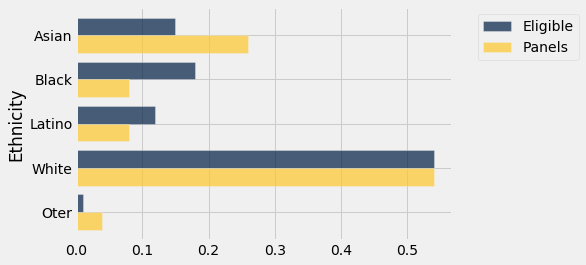

In [3]:
jury. barh('Ethnicity')

In [4]:
jury_with_diffs = jury.with_column('Difference', jury.column('Panels') - jury.column('Eligible'))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Oter,0.01,0.04,0.03


In [5]:
jury_with_diffs = jury_with_diffs.with_column('Absolute Difference', np.abs(jury_with_diffs.column('Difference')))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Oter,0.01,0.04,0.03,0.03


In [6]:
sum(jury_with_diffs.column('Absolute Difference'))

0.28

In [7]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) /2

In [8]:
total_variation_distance(jury_with_diffs.column('Panels'), jury_with_diffs.column('Eligible'))

0.14

In [9]:
eligible = jury.column('Eligible')

In [10]:
panels_and_sample = jury.with_column('Random Sample', sample_proportions(1453, eligible))

In [11]:
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.147281
Black,0.18,0.08,0.175499
Latino,0.12,0.08,0.134205
White,0.54,0.54,0.532691
Oter,0.01,0.04,0.0103235


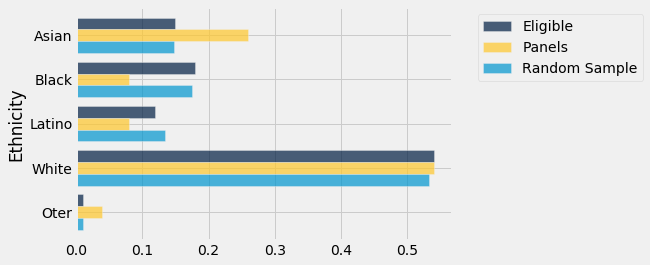

In [12]:
panels_and_sample.barh('Ethnicity')

In [13]:
total_variation_distance(panels_and_sample.column('Random Sample'), panels_and_sample.column('Eligible'))

0.014528561596696486

In [14]:
tvds = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)

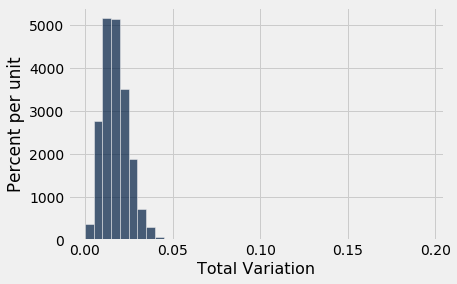

In [15]:
Table().with_column('Total Variation', tvds).hist(bins = np.arange(0, 0.2, 0.005))

In [16]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14

In [17]:
max(tvds)

0.05532002752924981

In [18]:
## revision

In [19]:
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Oter,0.01,0.04


In [20]:
sample_proportions(1453, eligible)

array([0.16586373, 0.16586373, 0.11493462, 0.54507915, 0.00825877])

In [21]:
def get_jury_sample():
    trial = 10000
    result = make_array()
    for i in np.arange(trial):
        sample_1 = sample_proportions(1453, eligible)
        result = np.append(result, sum(np.absolute(sample_1 - eligible))/2)
    return result

In [22]:
res = get_jury_sample()

In [23]:
min(res), max(res)

(0.0011149346180316794, 0.05172057811424639)

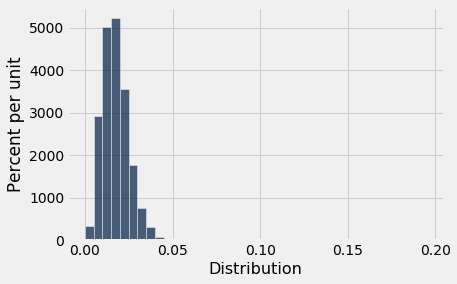

In [24]:
Table().with_column('Distribution', res).hist(bins = np.arange(0, 0.2, 0.005))

In [25]:
scores = Table.read_table('../Data/scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [26]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [27]:
scores.group('Section', np.average)

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [28]:
observed_averge = scores.group('Section', np.average).column('Midterm average').item(2)
observed_averge

13.666666666666666

In [29]:
np.average(scores.sample(27, with_replacement=False).column('Midterm'))

14.592592592592593

In [39]:
averages = make_array()
repetitions = 50000
for i in np.arange(repetitions):
    new_average = np.average(scores.sample(27, with_replacement=False).column('Midterm'))
    averages = np.append(averages, new_average)

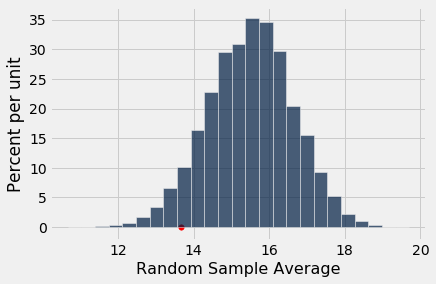

In [40]:
Table().with_column('Random Sample Average', averages).hist(bins=25)
plt.scatter(observed_averge, 0, color='red', s =30)

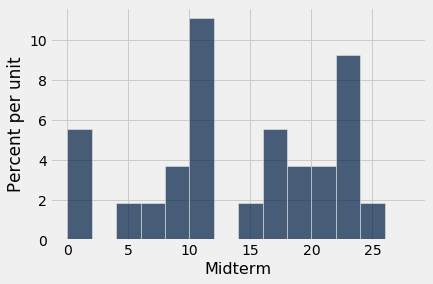

In [32]:
sec3 = scores.where('Section', 3)
sec3.hist('Midterm', bins=np.arange(0, 30, 2))

In [33]:
remainder = scores.where('Section', are.not_equal_to(3))
averages = make_array()
repetitions = 50000
for i in np.arange(repetitions):
    new_average = np.average(remainder.sample(27, with_replacement=False).column('Midterm'))
    averages = np.append(averages, new_average)

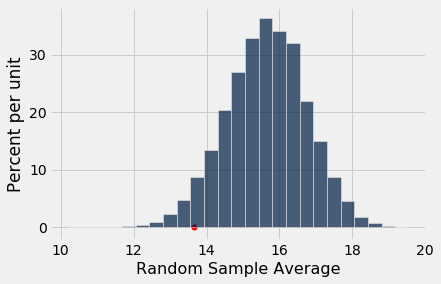

In [34]:
Table().with_column('Random Sample Average', averages).hist(bins=25)
plt.scatter(observed_averge, 0, color='red', s =30)

In [41]:
averages, observed_averge

(array([15.81481481, 13.62962963, 16.25925926, ..., 13.25925926,
        16.37037037, 13.22222222]),
 13.666666666666666)

In [42]:
np.count_nonzero(averages <= observed_averge)/repetitions

0.05722

In [43]:
np.count_nonzero(averages <= 13.6)/repetitions

0.05018

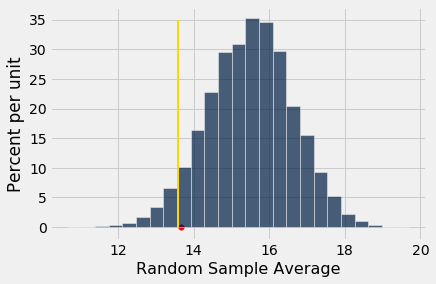

In [44]:
Table().with_column('Random Sample Average', averages).hist(bins=25)
plt.scatter(observed_averge, 0, color='red', s=30)
plt.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2)